In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import math
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [4]:
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']

In [5]:
y = df['target']
x = df.drop(['target'],axis=1)

### How many features are there, and what are their types?

In [12]:
print("Number of features: ",len(df.columns) - 1)
x.head()
print(y)

Number of features:  4
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [9]:
x.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [10]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### Display summary statistics for each column

In [13]:
x.describe() #using API

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#min, max manually
for i in df:
  if i != "class":
    print(i)
    print("min", df[i].min())
    print("max", df[i].max())
    print("range: ", df[i].max() - df[i].min(), "\n")

sepal length (cm)
min 4.3
max 7.9
range:  3.6000000000000005 

sepal width (cm)
min 2.0
max 4.4
range:  2.4000000000000004 

petal length (cm)
min 1.0
max 6.9
range:  5.9 

petal width (cm)
min 0.1
max 2.5
range:  2.4 

target
min 0
max 2
range:  2 



In [15]:
#mean
def calculate_mean(df, col):
    sum = 0.0
    count = 0
    for i in df[col]:
        if(type(i) == str): 
            return
        sum= sum + i
        count+=1
    return sum/count

In [16]:
for i in df:
    if(i != "class"):
        print("Calculated mean of ", i, " is ",calculate_mean(df, i))
        print("Mean calculated by API: ", df.describe()[i]["mean"], "\n")

Calculated mean of  sepal length (cm)  is  5.843333333333335
Mean calculated by API:  5.843333333333334 

Calculated mean of  sepal width (cm)  is  3.057333333333334
Mean calculated by API:  3.0573333333333337 

Calculated mean of  petal length (cm)  is  3.7580000000000027
Mean calculated by API:  3.7580000000000005 

Calculated mean of  petal width (cm)  is  1.199333333333334
Mean calculated by API:  1.1993333333333336 

Calculated mean of  target  is  1.0
Mean calculated by API:  1.0 



In [17]:
#Standard deviation
def calculate_std(df, col):
    mean = calculate_mean(df, col)
    dif = 0
    count = 0
    for i in df[col]:
        dif += (i - mean)**2
        count += 1
    return math.sqrt(dif / count)

for i in df:
    if(i != "class"):
        print("Calculated std of ", i, " is ",calculate_std(df, i))
        print("Std calculated by API: ", df.describe()[i]["std"], "\n")

Calculated std of  sepal length (cm)  is  0.8253012917851409
Std calculated by API:  0.828066127977863 

Calculated std of  sepal width (cm)  is  0.43441096773549437
Std calculated by API:  0.4358662849366982 

Calculated std of  petal length (cm)  is  1.7594040657753032
Std calculated by API:  1.7652982332594662 

Calculated std of  petal width (cm)  is  0.7596926279021594
Std calculated by API:  0.7622376689603465 

Calculated std of  target  is  0.816496580927726
Std calculated by API:  0.8192319205190405 



In [18]:
print('Data Visualisation')

Data Visualisation


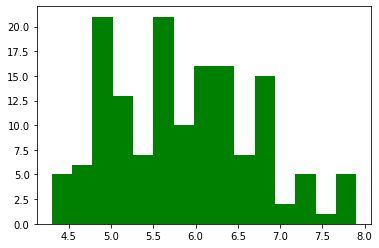

In [19]:
import matplotlib.pyplot as plt
plt.hist(x['sepal length (cm)'],bins=15,color='green')
plt.show()

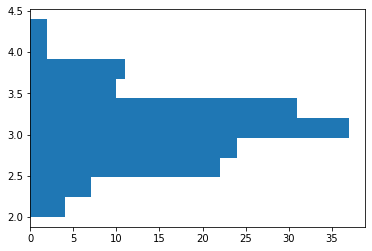

In [20]:
plt.hist(x['sepal width (cm)'],orientation='horizontal')
plt.show()

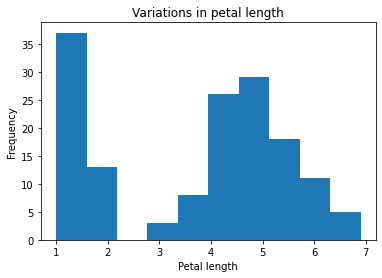

In [21]:
plt.hist(x['petal length (cm)'])
plt.title('Variations in petal length')
plt.xlabel('Petal length')
plt.ylabel('Frequency')
plt.show()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

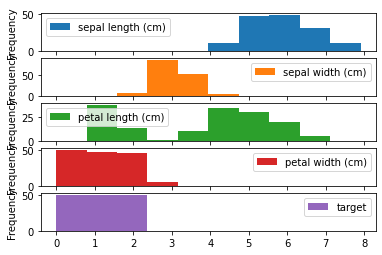

In [22]:
df.plot.hist(subplots=True, legend=True)

<AxesSubplot:>

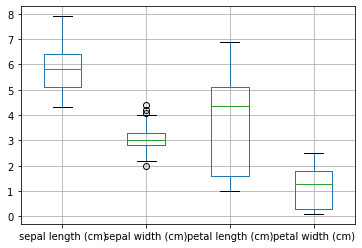

In [23]:
x.boxplot()

In [14]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
